### 📌 Decision Tree Regressor Summary

- **Type**: Supervised learning (for regression tasks with continuous targets).  
- **Structure**: Binary tree; internal nodes split data based on feature thresholds, leaves hold predicted values.  
- **Splitting Criteria**: Commonly uses MSE or MAE to decide best splits.  
- **Prediction**: Input traverses from root to leaf; leaf value = prediction.  
- **Overfitting**: Prone to overfitting if too deep. Use pruning (e.g., `ccp_alpha`) to reduce complexity.  
- **Pros**:
  - Easy to interpret (visual tree structure).
  - Captures complex feature-target relationships.
  - Handles both numerical and categorical data.
- **Cons**:
  - Can overfit, especially on noisy data.
  - May not generalize well alone → better with ensembles (e.g., Random Forest).
- **Key Hyperparameters**: `max_depth`, `min_samples_split`, `min_samples_leaf`, `ccp_alpha`.



In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

In [20]:
# Load the Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

In [21]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [22]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 USD
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

In [23]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
# Predictions
y_pred = model.predict(X_test)

In [27]:
y_pred

array([28.1, 33.1, 17.3, 22. , 23.2, 18.5, 16.6, 16.6, 22.7, 22. , 20.5,
       27.1,  8.4, 21.4, 18.5, 23.9, 18.8, 10.5, 46. , 13. , 23.1, 24.4,
       13.6, 22. , 14.5, 11.7, 21. , 13.5, 19.4, 20.7, 18.8, 23.1, 10.4,
       16.2, 13.3, 13.1, 33.4, 18.5, 20.4, 24.8, 19.8, 28.4, 46. , 19.3,
       22. , 13. , 14.9, 24.1, 17.7, 32. , 21.7, 36.1, 16.7, 28.4, 43.1,
       18.5, 15.2, 22.8, 22. , 22.5, 24.5, 33. , 29.4, 19.3, 26.6, 14.4,
       13. , 22.9, 22.8, 14.1, 21.8, 28.7,  8.3, 18.6, 21.5, 10.5, 19.8,
       50. , 13.3,  8.1, 21.2, 16.3, 19.4, 10.5, 14.5, 29.9, 14.8, 23.1,
       22.9, 18. , 23.3,  8.8, 19.2, 17.6, 16.2, 19.3, 50. , 16.3, 11.7,
       16.3, 19. , 26.4])

In [28]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 10.42
R2 Score: 0.86


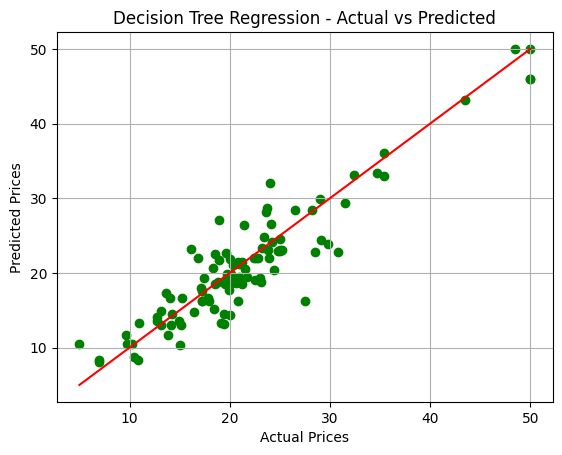

In [29]:
# Plotting true vs predicted
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regression - Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.grid(True)
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
tree = DecisionTreeRegressor(random_state=42)

# GridSearch with 5-fold CV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best R² Score (CV): 0.5181772340007835


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")

# Cross-validated R² score
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Random Forest R² (CV): {rf_scores.mean():.2f}")


Random Forest MSE: 7.90
Random Forest R² (CV): 0.63
